# Some initial data-exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# read data
train_a = pd.read_parquet('data/A/train_targets.parquet')
train_b = pd.read_parquet('data/B/train_targets.parquet')
train_c = pd.read_parquet('data/C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('data/C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('data/C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('data/C/X_test_estimated.parquet')

In [3]:
# concat the dataframes, getting all locations

X_train_observed_a["location"] = "A"
X_train_observed_b["location"] = "B"
X_train_observed_c["location"] = "C"

X_train_observed = pd.concat([X_train_observed_a, X_train_observed_b, X_train_observed_c], axis=0, ignore_index=True)

X_train_estimated_a["location"] = "A"
X_train_estimated_b["location"] = "B"
X_train_estimated_c["location"] = "C"

X_train_estimated = pd.concat([X_train_estimated_a, X_train_estimated_b, X_train_estimated_c], axis=0, ignore_index=True)

train_a["location"] = "A"
train_b["location"] = "B"
train_c["location"] = "C"

train = pd.concat([train_a, train_b, train_c], axis=0, ignore_index=True)

# rename columns

X_train_observed.rename(columns={'date_forecast': 'time'}, inplace=True)
X_train_estimated.rename(columns={'date_forecast': 'time'}, inplace=True)

# join X and Y data

train_observed = pd.merge(X_train_observed, train, how="left", on=["time", "location"])
train_estimated = pd.merge(X_train_estimated, train, how="left", on=["time", "location"])

In [4]:
train_observed['location'] = pd.Categorical(train_observed.location)
train_estimated['location'] = pd.Categorical(train_estimated.location)

In [5]:
# add time-diffs to est. 
time_diffs = X_train_estimated["time"] - X_train_estimated["date_calc"]
X_train_estimated["time_diffs"] = [t.seconds/3600 for t in time_diffs]
X_train_observed["time_diffs"] = 0


# add feature for observed / estimated status
X_train_estimated["is_observed"] = 0
X_train_observed["is_observed"] = 1

In [6]:
X_train = pd.concat([X_train_estimated, X_train_observed], axis=0, ignore_index=True)

In [7]:
X_train.fillna(0, inplace=True)

/var/folders/n0/h43nw_h10zg8v_gzjtqbktp80000gn/T/ipykernel_56555/2962106052.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[us], please explicitly cast to a compatible dtype first.
  X_train.fillna(0, inplace=True)


In [8]:
X_train = pd.merge(X_train, train, how="left", on=["time", "location"])

## Histogram

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>,
        <Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>,
        <Axes: title={'center': 'cloud_base_agl:m'}>],
       [<Axes: title={'center': 'dew_or_rime:idx'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>,
        <Axes: title={'center': 'diffuse_rad_1h:J'}>,
        <Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'direct_rad_1h:J'}>,
        <Axes: title={'center': 'effective_cloud_cover:p'}>],
       [<Axes: title={'center': 'elevation:m'}>,
        <Axes: title={'center': 'fresh_snow_12h:cm'}>,
        <Axes: title={'center': 'fresh_snow_1h:cm'}>,
        <Axes: title={'center': 'fresh_snow_24h:cm'}>,
        <Axes: title={'cen

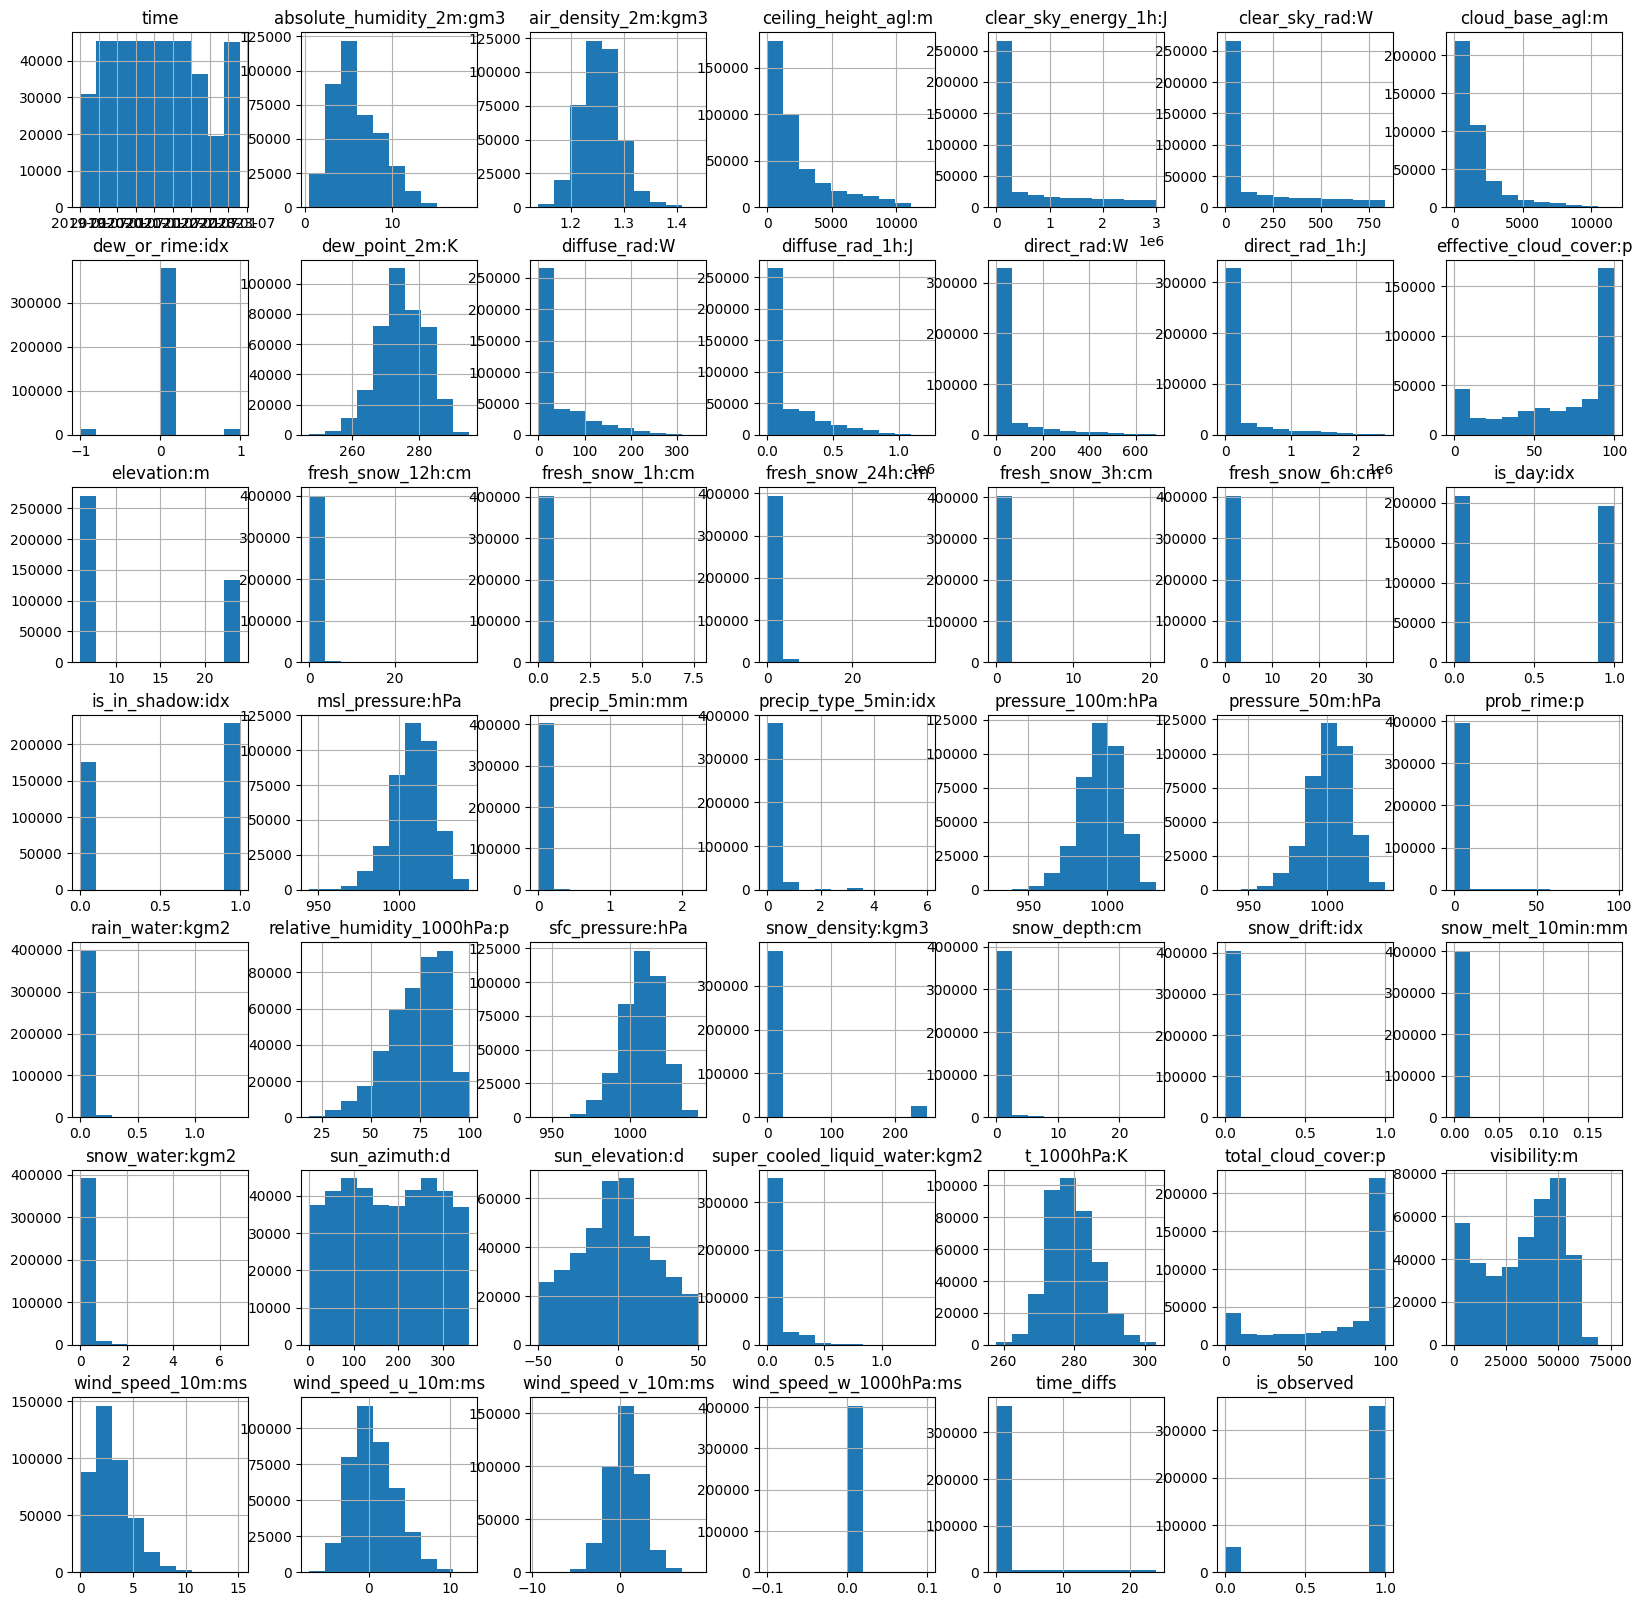

In [67]:
X_train.hist(figsize=(20, 20))

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>,
        <Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>,
        <Axes: title={'center': 'cloud_base_agl:m'}>],
       [<Axes: title={'center': 'dew_or_rime:idx'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>,
        <Axes: title={'center': 'diffuse_rad_1h:J'}>,
        <Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'direct_rad_1h:J'}>,
        <Axes: title={'center': 'effective_cloud_cover:p'}>],
       [<Axes: title={'center': 'elevation:m'}>,
        <Axes: title={'center': 'fresh_snow_12h:cm'}>,
        <Axes: title={'center': 'fresh_snow_1h:cm'}>,
        <Axes: title={'center': 'fresh_snow_24h:cm'}>,
        <Axes: title={'cen

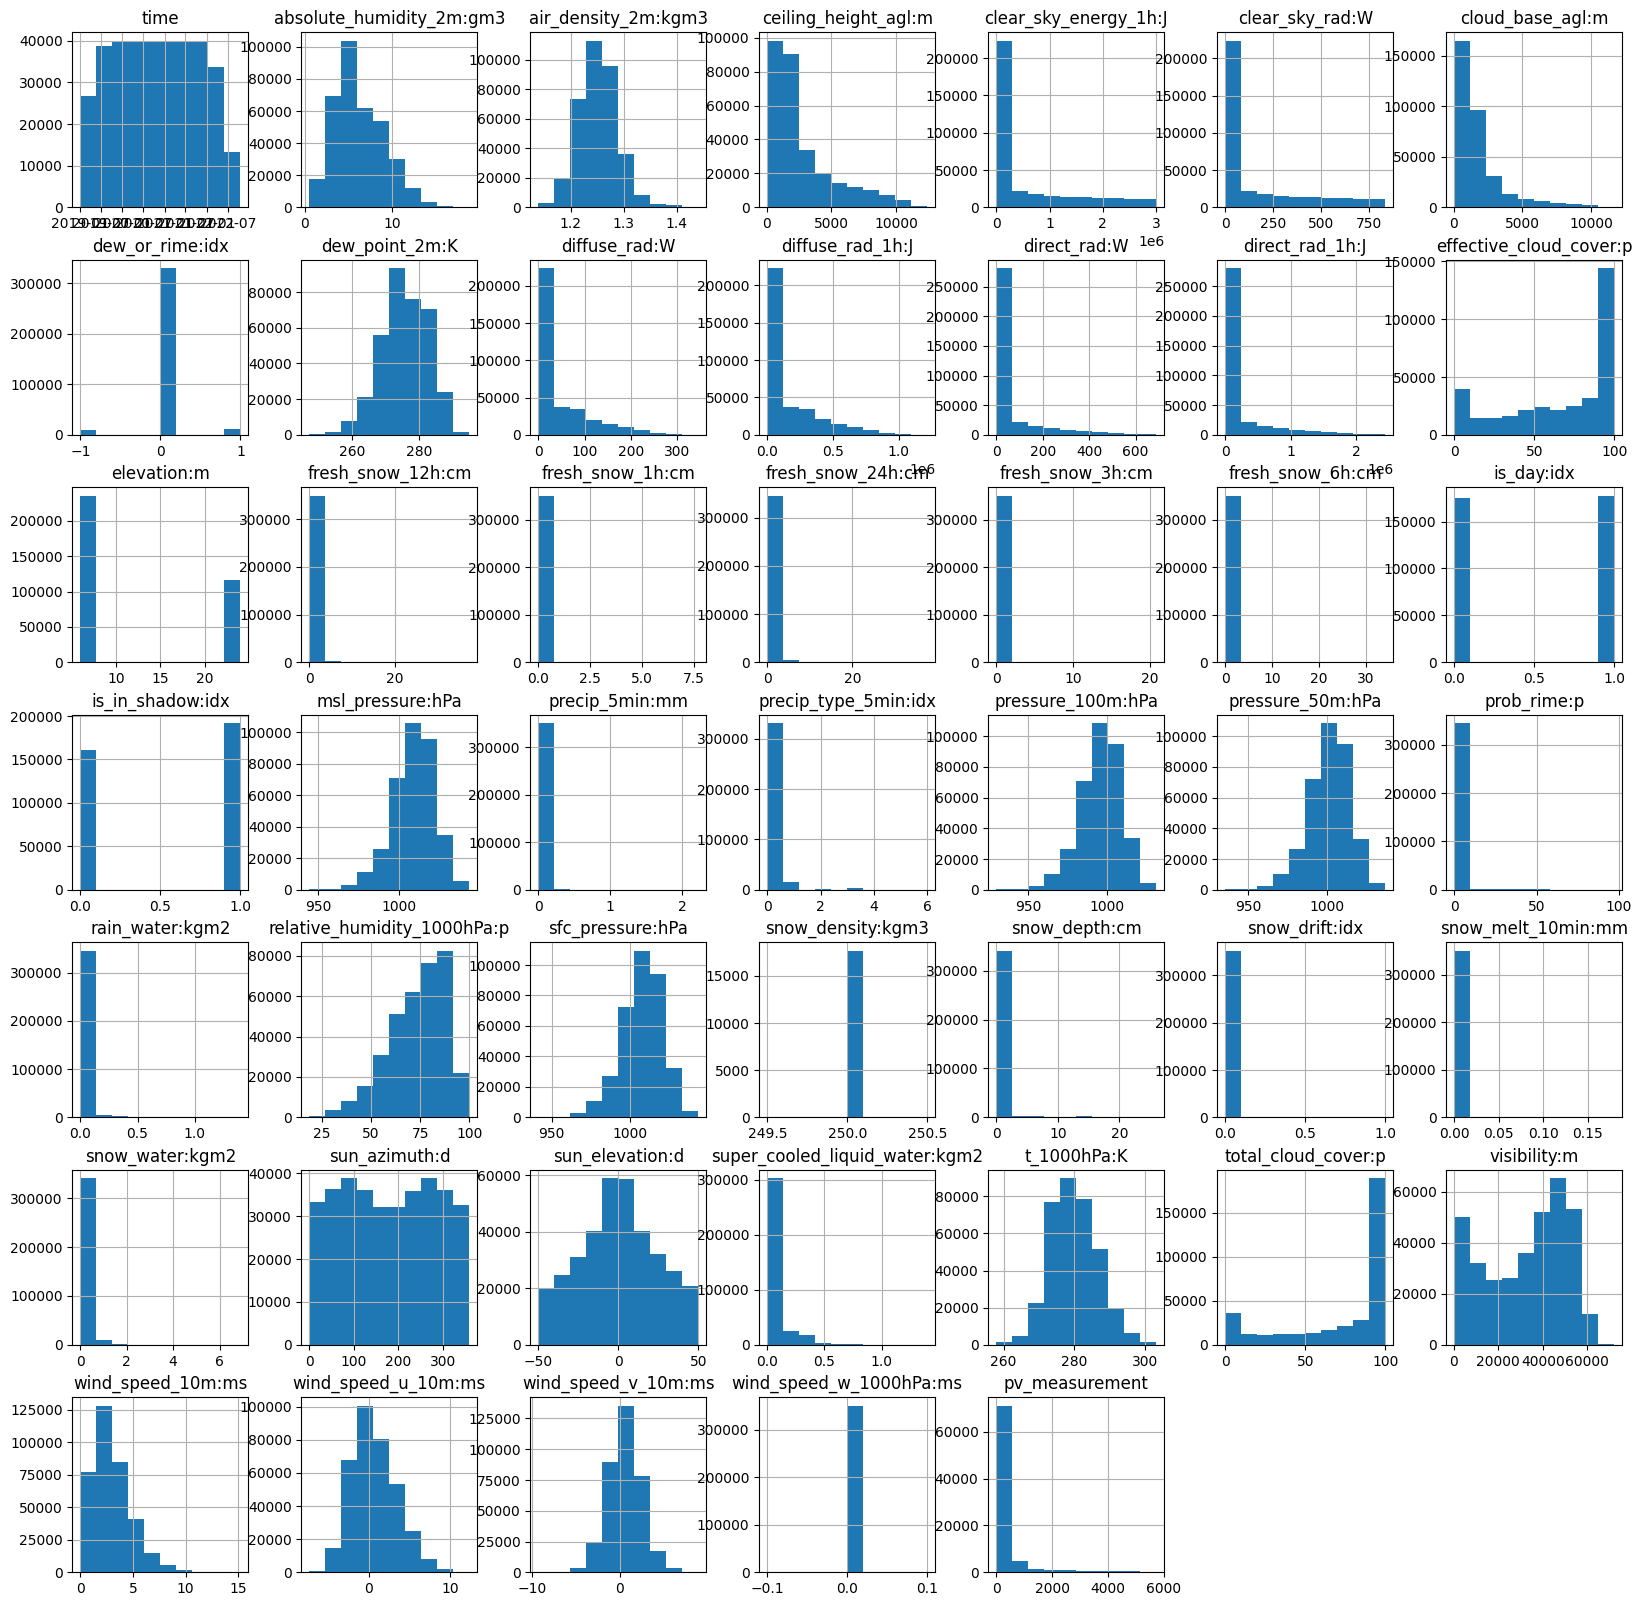

In [40]:
train_observed.hist(figsize=(20, 20))

array([[<Axes: title={'center': 'date_calc'}>,
        <Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>,
        <Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>],
       [<Axes: title={'center': 'cloud_base_agl:m'}>,
        <Axes: title={'center': 'dew_or_rime:idx'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>,
        <Axes: title={'center': 'diffuse_rad_1h:J'}>,
        <Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'direct_rad_1h:J'}>],
       [<Axes: title={'center': 'effective_cloud_cover:p'}>,
        <Axes: title={'center': 'elevation:m'}>,
        <Axes: title={'center': 'fresh_snow_12h:cm'}>,
        <Axes: title={'center': 'fresh_snow_1h:cm'}>,
        <Axes: title={'center': 'f

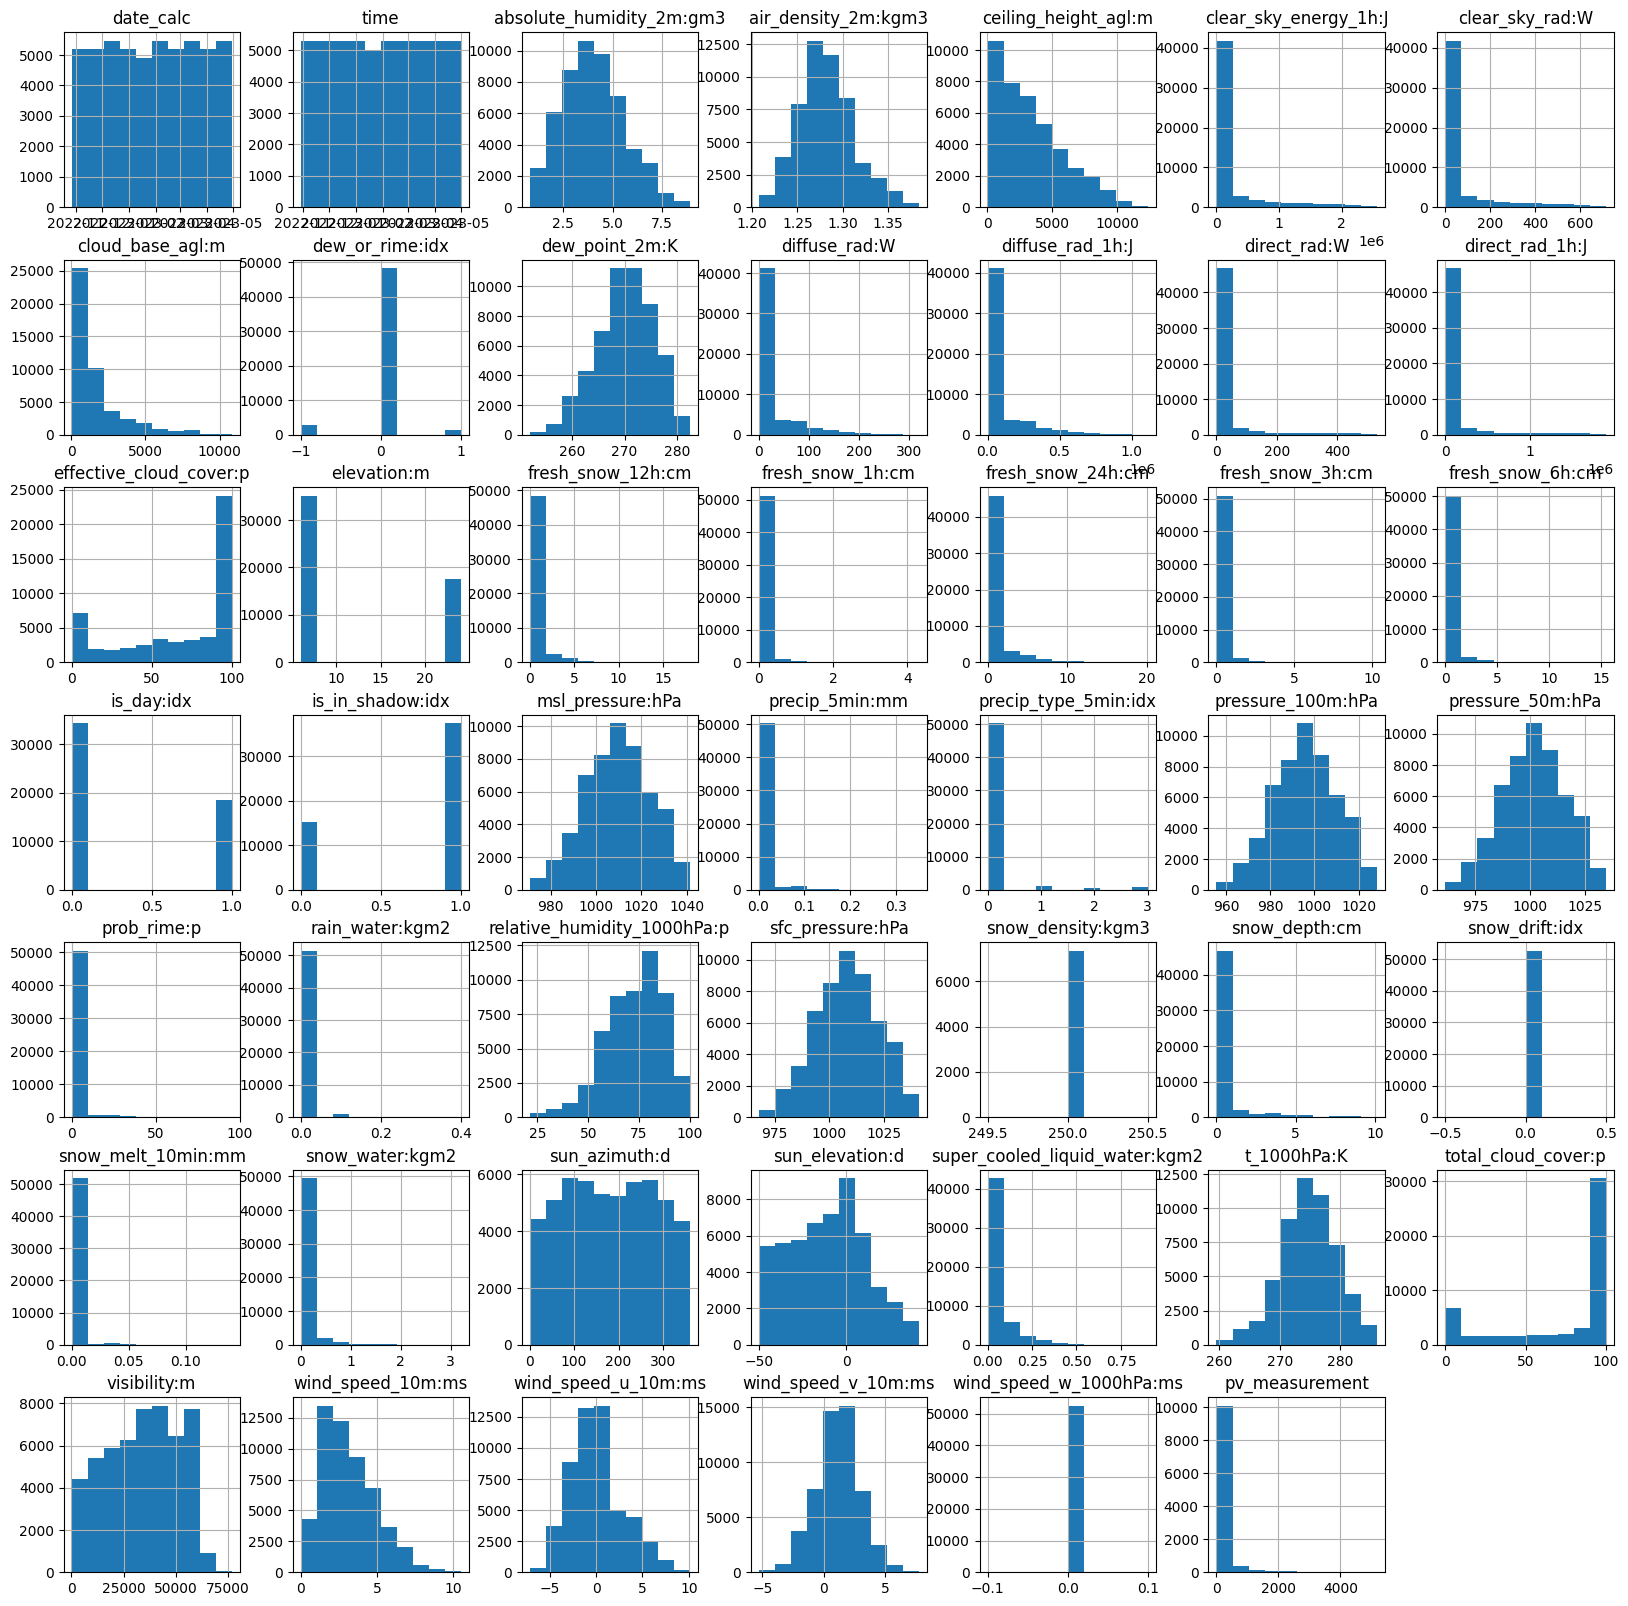

In [41]:
train_estimated.hist(figsize=(20, 20))

## Correlations

In [85]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_observed["location"] = encoder.fit_transform(train_observed["location"])
train_estimated["location"] = encoder.fit_transform(train_estimated["location"])
X_train["location"] = encoder.fit_transform(X_train["location"])

In [86]:
# corr_matrix_observed = train_observed.corr()
# corr_matrix_estimated = train_estimated.corr()
corr_matrix = X_train.drop(columns=["time", "date_calc"], inplace=False).corr()

In [87]:
corr_matrix["pv_measurement"].sort_values(ascending=False)

pv_measurement                    1.000000
direct_rad:W                      0.277791
direct_rad_1h:J                   0.270681
clear_sky_rad:W                   0.268995
clear_sky_energy_1h:J             0.262063
diffuse_rad:W                     0.234334
diffuse_rad_1h:J                  0.229992
sun_elevation:d                   0.224165
is_day:idx                        0.173775
t_1000hPa:K                       0.124683
dew_point_2m:K                    0.099209
absolute_humidity_2m:gm3          0.097739
pressure_100m:hPa                 0.069283
pressure_50m:hPa                  0.067563
sfc_pressure:hPa                  0.065837
visibility:m                      0.064702
msl_pressure:hPa                  0.059732
is_observed                       0.031835
cloud_base_agl:m                  0.031795
ceiling_height_agl:m              0.009648
wind_speed_w_1000hPa:ms          -0.000505
dew_or_rime:idx                  -0.000622
snow_drift:idx                   -0.000888
snow_melt_1

## Correlation > |0.1|

| Variable                     | Correlation |
|----------------------------- |------------ |
| relative_humidity_1000hPa:p | -0.110539   |
| air_density_2m:kgm3         | -0.125160   |
| location                     | -0.151131   |
| is_in_shadow:idx             | -0.190822   |
| direct_rad:W                 | 0.277791    |
| direct_rad_1h:J              | 0.270681    |
| clear_sky_rad:W              | 0.268995    |
| clear_sky_energy_1h:J        | 0.262063    |
| diffuse_rad:W                | 0.234334    |
| diffuse_rad_1h:J             | 0.229992    |
| sun_elevation:d              | 0.224165    |
| is_day:idx                   | 0.173775    |
| t_1000hPa:K                  | 0.124683    |


In [29]:
# features = ["direct_rad:W", "clear_sky_rad:W", "direct_rad_1h:J", "clear_sky_energy_1h:J", "diffuse_rad:W", 
#             "diffuse_rad_1h:J", "sun_elevation:d", "is_day:idx", "location", "is_in_shadow:idx", "pv_measurement"] #Note pv_measurement not a feature

features = ["direct_rad:W", "clear_sky_rad:W", "sun_elevation:d", "is_in_shadow:idx", "pv_measurement", "diffuse_rad_1h:J"] #Note pv_measurement not a feature

In [10]:
features = [
    "relative_humidity_1000hPa:p",
    "air_density_2m:kgm3",
    "location",
    "is_in_shadow:idx",
    "direct_rad:W",
    "direct_rad_1h:J",
    "clear_sky_rad:W",
    "clear_sky_energy_1h:J",
    "diffuse_rad:W",
    "diffuse_rad_1h:J",
    "sun_elevation:d",
    "is_day:idx",
    "t_1000hPa:K"
]

array([[<Axes: xlabel='direct_rad:W', ylabel='direct_rad:W'>,
        <Axes: xlabel='clear_sky_rad:W', ylabel='direct_rad:W'>,
        <Axes: xlabel='sun_elevation:d', ylabel='direct_rad:W'>,
        <Axes: xlabel='location', ylabel='direct_rad:W'>,
        <Axes: xlabel='is_in_shadow:idx', ylabel='direct_rad:W'>,
        <Axes: xlabel='pv_measurement', ylabel='direct_rad:W'>],
       [<Axes: xlabel='direct_rad:W', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='clear_sky_rad:W', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='sun_elevation:d', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='location', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='is_in_shadow:idx', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='pv_measurement', ylabel='clear_sky_rad:W'>],
       [<Axes: xlabel='direct_rad:W', ylabel='sun_elevation:d'>,
        <Axes: xlabel='clear_sky_rad:W', ylabel='sun_elevation:d'>,
        <Axes: xlabel='sun_elevation:d', ylabel='sun_elevation:d'>,
        <Axes: xlab

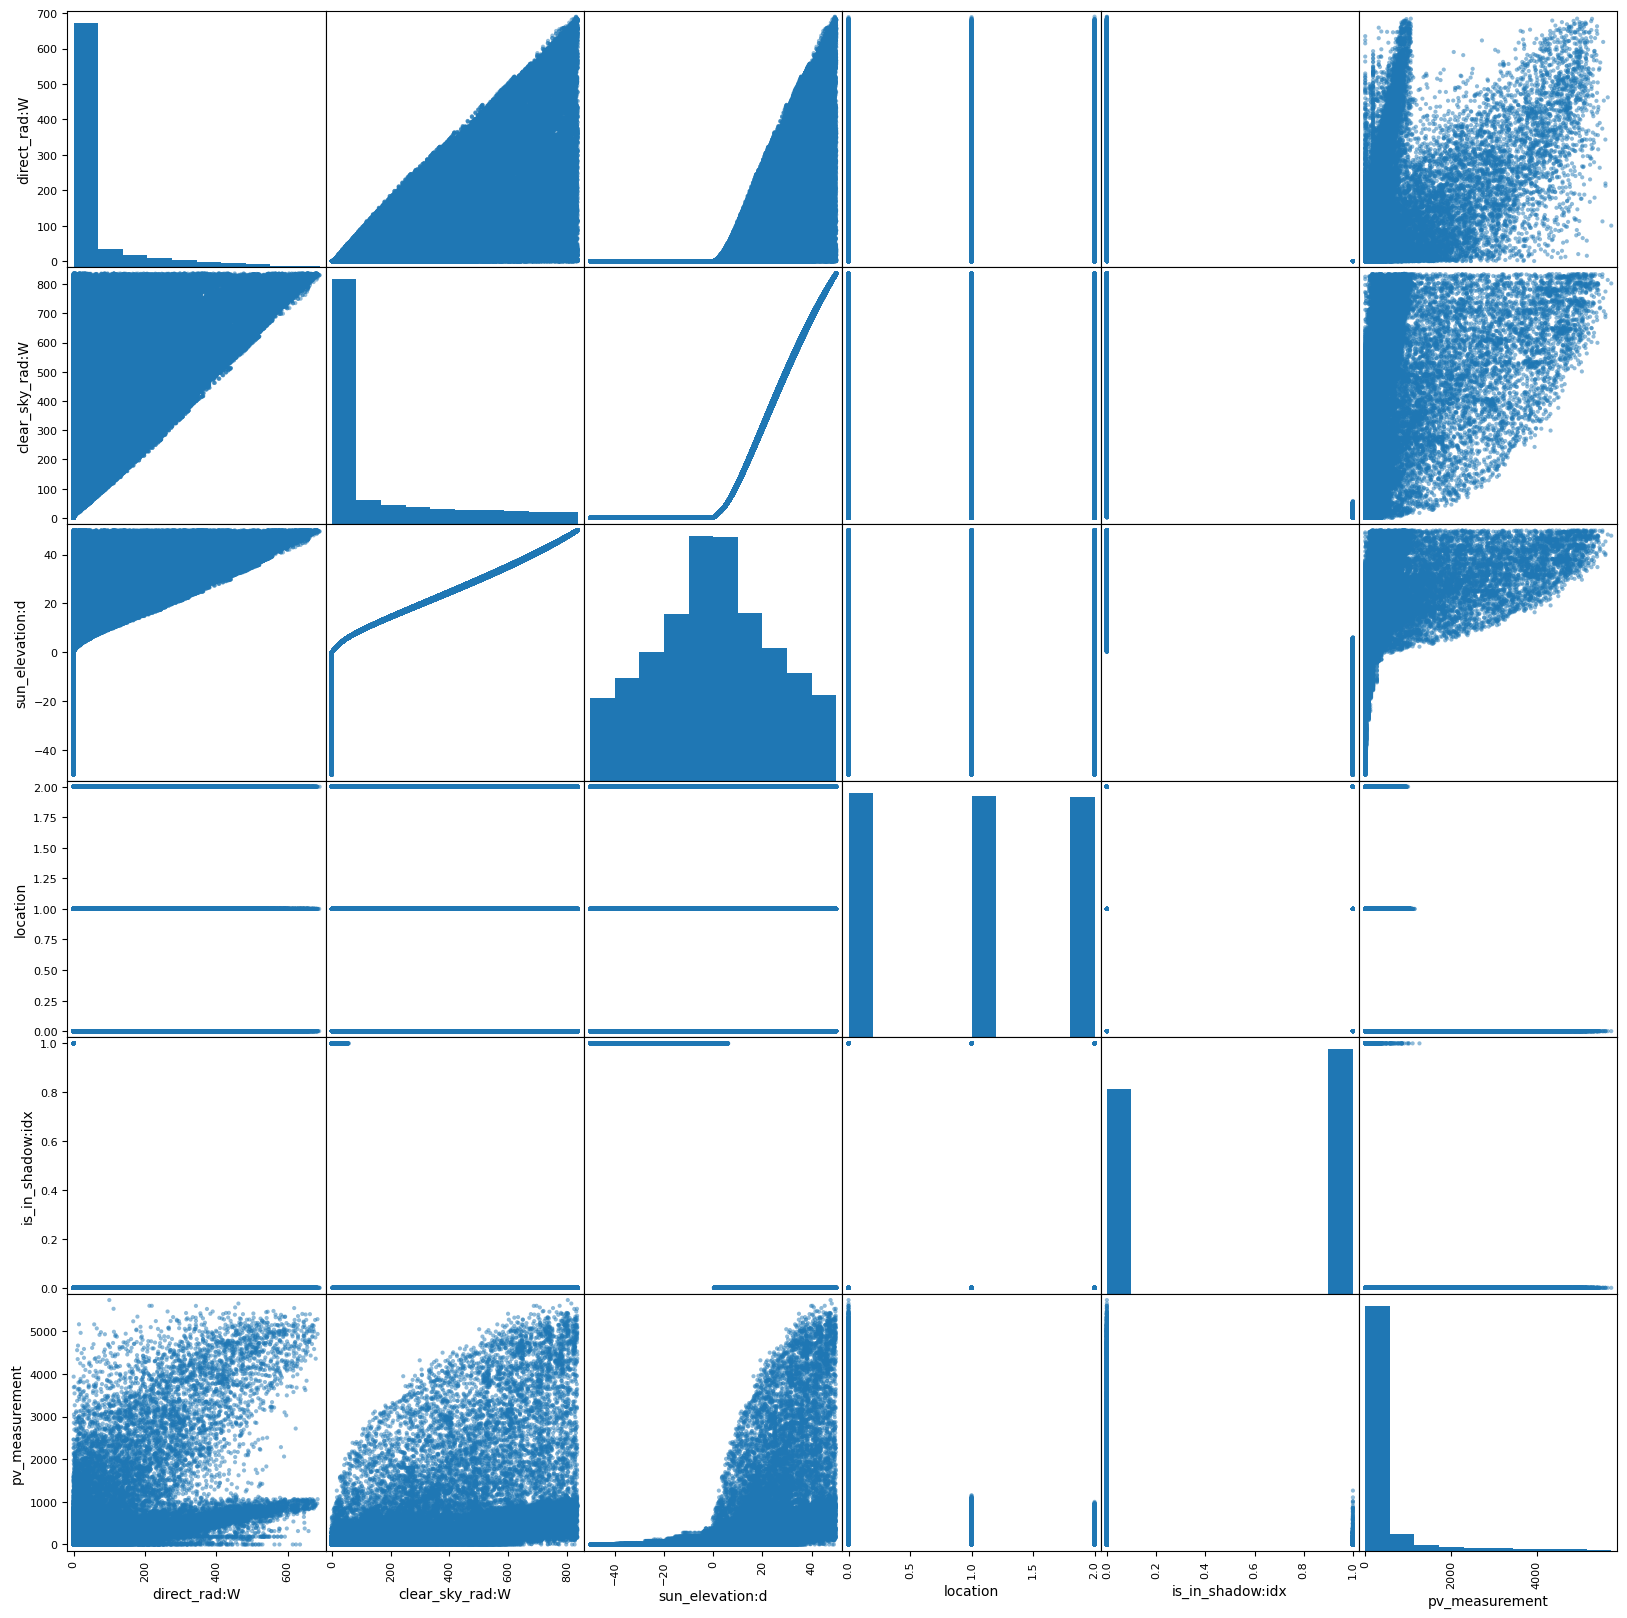

In [60]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_observed[features], figsize=(20, 20))

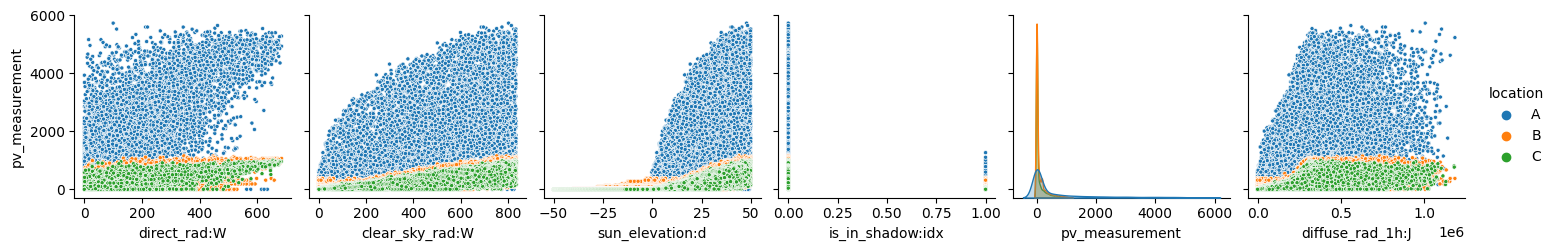

In [30]:
import warnings

import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")


import seaborn as sns
sns.pairplot(train_observed, y_vars="pv_measurement", x_vars=features, hue="location", markers=".")

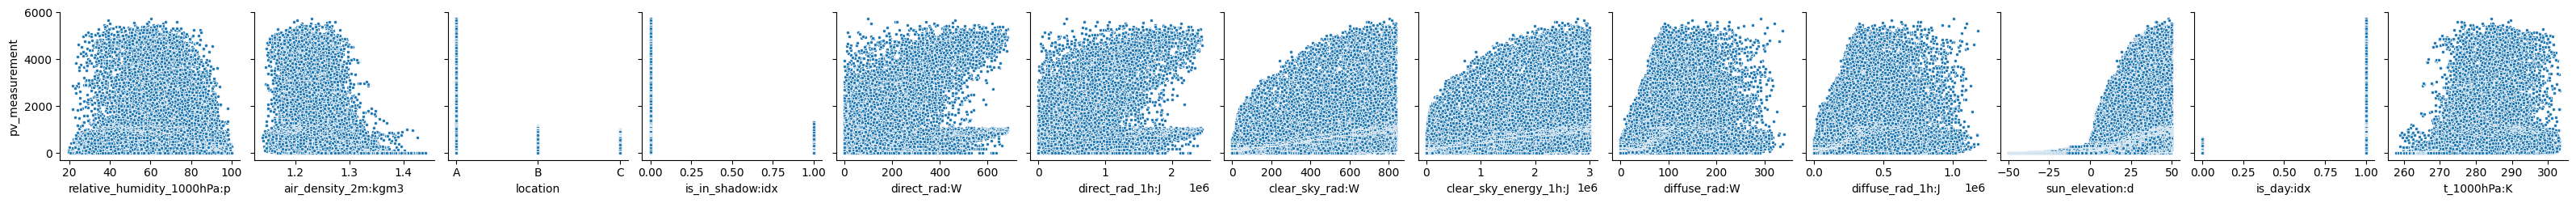

In [11]:
import warnings

import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")


import seaborn as sns
sns.pairplot(X_train, y_vars="pv_measurement", x_vars=features, markers=".")

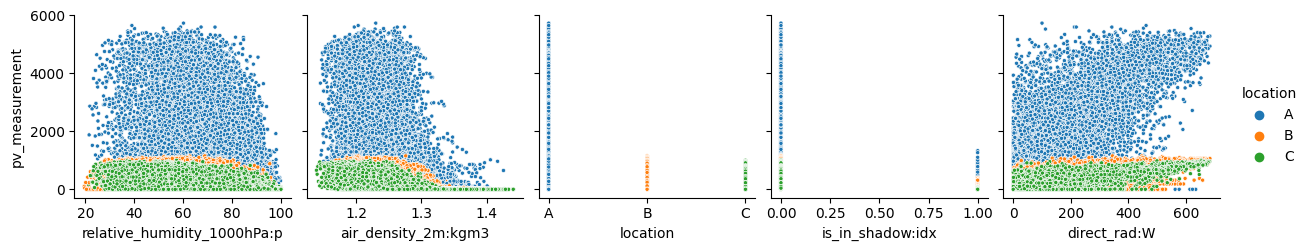

In [13]:
sns.pairplot(X_train, y_vars="pv_measurement", x_vars=features[:5], hue="location", markers=".")

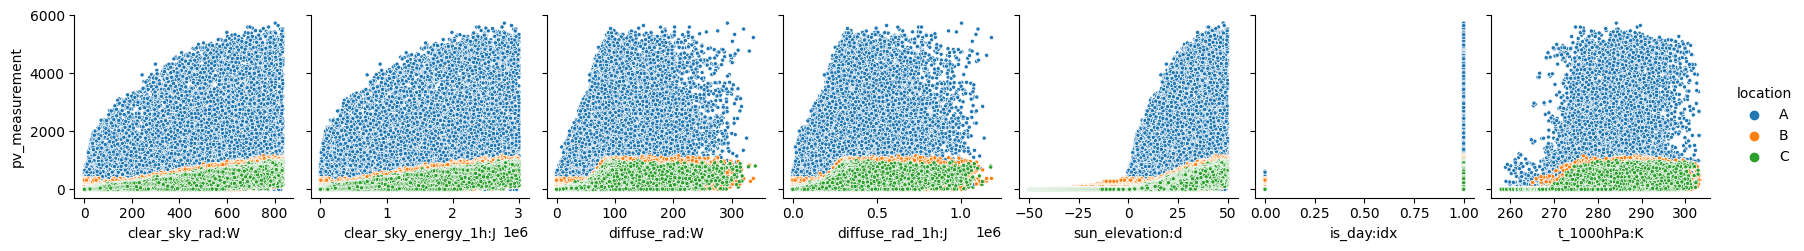

In [14]:
sns.pairplot(X_train, y_vars="pv_measurement", x_vars=features[6:], hue="location", markers=".")

# Predictions

new feature: how many hours before is the prediction? (maybe will capture some uncertainty)

In [55]:
time_diffs = X_train_estimated["time"] - X_train_estimated["date_calc"]
X_train_estimated["time_diffs"] = [t.seconds/3600 for t in time_diffs]

In [56]:
X_train_estimated

,date_calc,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location,time_diffs
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0,A,14.995000
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0,A,15.245000
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,...,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0,A,15.495000
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,...,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0,A,15.745000
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,...,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0,A,15.995000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52723,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,...,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0,C,15.748611
52724,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,...,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0,C,15.998611
52725,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,...,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0,C,16.248611
52726,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,...,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0,C,16.498611


In [37]:
X_train_estimated["time"][0]

Timestamp('2022-10-28 22:00:00')

In [47]:
min(diff).seconds / 3600

15.95111111111111

In [36]:
max(diff)

Timedelta('1 days 16:44:57')